<center><image src="https://drive.google.com/uc?id=1n3G4TdK_u6PQHcLrxB_A0HijNdigXmUH">

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ, 2024</b></h3>

<h1 style="text-align: center;"><b>Домашнее задание. Библиотека sklearn и классификация с помощью KNN</b></h1>

## Описание домашнего задания

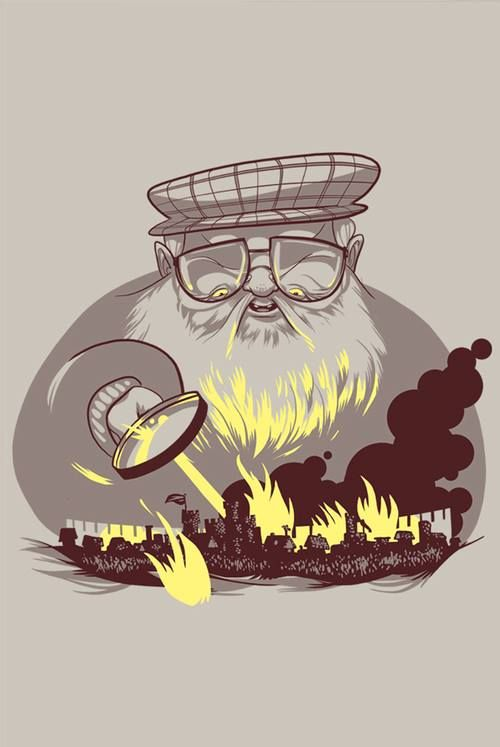

В данном задании вы будете работать с датасетом о персонажах из вселенной Игры Престолов [A Wiki of Ice and Fire](http://awoiaf.westeros.org/). Вам предстоит предсказать, кто из персонажей умрет, а кто останется вживых.



Описание данных:

* **name**: Имя персонажа

* **Title**: Социальный статус или знатность

* **House**: Дом, к которому принадлежит персонаж

* **Culture**: Социальная группа, к которой принадлежит персонаж

* **book1/2/3/4/5**: Появление персонажа в книге

* **Is noble**: Знатность персонажа, основанное на титуле

* **Age**: Отсчет времени: 305 AC

* **male**: Мужчина или женщина

* **dateOfBirth**: дата рождения

* **Spouse**: Имя супруги\а персонажа

* **Father**: Имя отца персонажа

* **Mother**: Имя матери персонажа

* **Heir**: Имя наследника персонажа

* **Is married**: Represents whether the character is married

* **Is spouse alive**: Represents whether character's spouse is alive

* **Is mother alive:** Жива ли мать персонажа

* **Is heir alive:** Жив ли наследник персонажа

* **Is father alive:** Указывает, жив ли отец персонажа

* **Number dead relations:** Количество умерших персонажей, с которыми персонаж связан

* **Popularity score:** Количество внутренних входящих и исходящих ссылок на страницу персонажей в вики http://awoiaf.westeros.org

Целевая переменная:
* **isAlive**: жив ли персонаж в книге

Оценивание:

Баллы считаются следующим образом:

1) $1.00 \geqslant score \geqslant 0.84$ --- 5 баллов

2) $0.84 > score \geqslant 0.77$ --- 4 балла

3) $0.77 > score \geqslant 0.70$ --- 3 балла

4) $0.70 > score \geqslant 0.65$ --- 2 балла

5) $0.65 > score \geqslant 0.6$ --- 1 балл

6) $0.60 > score$ --- 0 баллов

## Часть 1. Анализ и предобработка данных

Здесь вам необходимо сделать все шаги, которые обсуждались в первой части семинара.
* Предобработка данных
  * Обработка пропущенных данных
  * Создание новых признаков
  * Удаление ненужных столбцов
* Анализ данных
  * Анализ целевой переменной
  * Анализ признаков
  * Анализ влияния признаков на целевую переменную
* Подготовка данных для обучения модели

Загружаем датасет

In [101]:
!gdown 1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3 # test dataset
!gdown 1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v # train dataset

Downloading...
From: https://drive.google.com/uc?id=1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3
To: /content/game_of_thrones_test.csv
100% 37.3k/37.3k [00:00<00:00, 68.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v
To: /content/game_of_thrones_train.csv
100% 138k/138k [00:00<00:00, 9.55MB/s]


In [102]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [103]:
!cp /content/game_of_thrones_train.csv /content/drive/MyDrive/

**Задание 1.1.** Импортируйте библиотеки pandas, matplotlib, seaborn

In [120]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import sklearn.preprocessing
import seaborn as sns

**Задание 1.2.** Загрузите датасет в Pandas DataFrame при помощи функции `read_csv`. Вместо дефолтных наименований строк `0,1,...`, при помощи параметра `index_col`, сделайте значения колонки `S.No` наименованиями строк:

In [105]:
data = pd.read_csv('drive/MyDrive/game_of_thrones_train.csv', index_col='S.No')
# series = pd.Series(read_csv(drive/MyDrive/game_of_thrones_train.csv))
df = pd.DataFrame(data)
df.head()
df.sample(3)

,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,...,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
S.No,,,,,,,,,,,,,,,,,,,,,
228,Urreg,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,0,NaN,0,0.010033,1
1519,Harrion Karstark,Karhold,1,Northmen,NaN,NaN,NaN,NaN,House Karstark,NaN,...,NaN,NaN,NaN,NaN,0,1,NaN,2,0.096990,1
1174,Lucas Codd,NaN,0,Ironborn,NaN,NaN,NaN,NaN,House Codd,NaN,...,NaN,NaN,NaN,NaN,0,0,NaN,0,0.023411,1


**Задание 1.3.** Предобработка (очистка) данных.

Проанализируйте, если в колонках NaN значения. Если есть, примите решение, как вы их будете обрабатывать. Вы можете либо удалить их, либо заполнить каким нибудь значением (например, медианой или модой).

In [106]:
df.age.replace(np.nan, np.mean(df["age"].dropna().values), inplace=True)
df.title.replace(np.nan, "Untitled")
df.house.replace(np.nan, "No House")
df.culture.replace(np.nan, "No Culture")
df

<ipython-input-106-4b5b70583a58>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.age.replace(np.nan, np.mean(df["age"].dropna().values), inplace=True)


,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,...,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
S.No,,,,,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,NaN,1,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,...,1.0,0.0,0.0,NaN,0,0,35.290323,11,0.605351,0
2,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,NaN,NaN,NaN,House Frey,Perra Royce,...,NaN,NaN,NaN,1.0,1,1,97.000000,1,0.896321,1
3,Addison Hill,Ser,1,NaN,NaN,NaN,NaN,NaN,House Swyft,NaN,...,NaN,NaN,NaN,NaN,0,1,35.290323,0,0.267559,1
4,Aemma Arryn,Queen,0,NaN,82.0,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,...,NaN,NaN,NaN,0.0,1,1,23.000000,0,0.183946,0
5,Sylva Santagar,Greenstone,0,Dornish,276.0,NaN,NaN,NaN,House Santagar,Eldon Estermont,...,NaN,NaN,NaN,1.0,1,1,29.000000,0,0.043478,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,Marwyn,Archmaester,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,1,35.290323,0,0.160535,1
1554,Masha Heddle,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,0,35.290323,0,0.040134,0
1555,Matthos Seaworth,NaN,1,NaN,NaN,NaN,NaN,NaN,House Seaworth,NaN,...,NaN,NaN,NaN,NaN,0,0,35.290323,0,0.076923,0


**Задание 1.4.** Создайте новые признаки.
* Создайте признак isPopular. У вас есть в таблице признак popularity score, поставьте какой то порог, например, 0.5, и пусть те персонажи, у которых popularity score меньше 0.5, непопулярны, т.е. isPopular = 0. Если же выше 0.5, тогда пусть isPopular=1.
* Создайте признак boolDeadRelations. Давайте упростим признак numDeadRelations, и просто поделим людей на тех, у кого были хоть какие то отношения с мертвыми персонажами, т.е. numDeadRelations > 0, и те, у которых не было, т.е. numDeadRelations = 0.
* Упростите признак culture, объединив схожие названия в один.


In [107]:
df["isPopular"] = (df.popularity > 0.5).astype(int)
df["boolDeadRelations"] = (df.numDeadRelations > 0).astype(int)

In [108]:
# Подсказка
cult = {
    'Summer Islands': ['summer islands', 'summer islander', 'summer isles'],
    'Ghiscari': ['ghiscari', 'ghiscaricari',  'ghis'],
    'Asshai': ["asshai'i", 'asshai'],
    'Lysene': ['lysene', 'lyseni'],
    'Andal': ['andal', 'andals'],
    'Braavosi': ['braavosi', 'braavos'],
    'Dornish': ['dornishmen', 'dorne', 'dornish'],
    'Myrish': ['myr', 'myrish', 'myrmen'],
    'Westermen': ['westermen', 'westerman', 'westerlands'],
    'Westerosi': ['westeros', 'westerosi'],
    'Stormlander': ['stormlands', 'stormlander'],
    'Norvoshi': ['norvos', 'norvoshi'],
    'Northmen': ['the north', 'northmen'],
    'Free Folk': ['wildling', 'first men', 'free folk'],
    'Qartheen': ['qartheen', 'qarth'],
    'Reach': ['the reach', 'reach', 'reachmen'],
}
for k, v in cult.items():
    df["culture"]=df.culture.str.lower().replace(v, k)
# df.culture.value_counts()
df


,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,...,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive,isPopular,boolDeadRelations
S.No,,,,,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,NaN,1,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,...,0.0,NaN,0,0,35.290323,11,0.605351,0,1,1
2,Walder Frey,Lord of the Crossing,1,rivermen,208.0,NaN,NaN,NaN,House Frey,Perra Royce,...,NaN,1.0,1,1,97.000000,1,0.896321,1,1,1
3,Addison Hill,Ser,1,NaN,NaN,NaN,NaN,NaN,House Swyft,NaN,...,NaN,NaN,0,1,35.290323,0,0.267559,1,0,0
4,Aemma Arryn,Queen,0,NaN,82.0,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,...,NaN,0.0,1,1,23.000000,0,0.183946,0,0,0
5,Sylva Santagar,Greenstone,0,dornish,276.0,NaN,NaN,NaN,House Santagar,Eldon Estermont,...,NaN,1.0,1,1,29.000000,0,0.043478,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,Marwyn,Archmaester,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0,1,35.290323,0,0.160535,1,0,0
1554,Masha Heddle,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0,0,35.290323,0,0.040134,0,0,0
1555,Matthos Seaworth,NaN,1,NaN,NaN,NaN,NaN,NaN,House Seaworth,NaN,...,NaN,NaN,0,0,35.290323,0,0.076923,0,0,0


**Задание 1.5.** Проанализируйте, какие столбцы являются существенными и влияют на предсказание, а какие нет. Удалите ненужные столбцы по вашему мнению.

In [180]:
columns=["name", "dateOfBirth", "mother", "father", "heir", "spouse", "numDeadRelations", "popularity", "isAliveMother", "isAliveFather", "isAliveHeir", "isAliveSpouse"]
df.drop(columns=columns, inplace = True)
data.drop(columns=columns, inplace = True)

**Задание 1.6.** Проанализируйте целевую переменную. Посмотрите, является ли она категориальной или количественной. Так как мы говорим о задаче классификации, проанализируйте является ли датасет сбалансированным по классам или нет.

isAlive
1    1212
0     345
Name: count, dtype: int64


<Axes: >

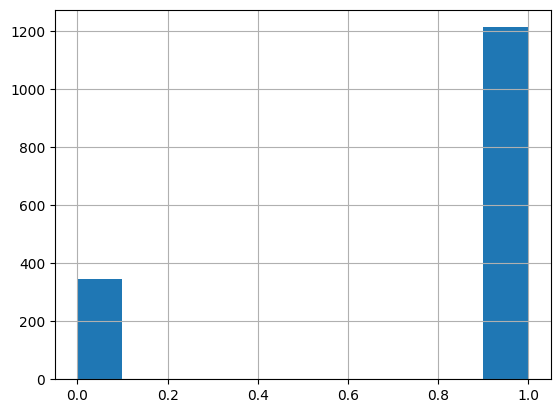

In [110]:
print(df["isAlive"].value_counts())
df.isAlive.hist()

**Задание 1.7.** Проанализируйте признаки.
  * Обработайте категориальные признаки и переведите их в числа. Можете выбрать любой кодировщик.
  * Проанализируйте количественные признаки. Есть ли корреляция между признаками?

In [139]:
categorial_columns=["title", "culture", "house"]
unprocessed_cat_columns=categorial_columns
categorial_features=df[categorial_columns]
unprocessed_cat_features=df[unprocessed_cat_columns]
df.info()
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for column in unprocessed_cat_columns:
  df[column] = label_encoder.fit_transform(df[column])
# data["title"].value_counts()
df
numerical_columns = ["age"]
sns.set()
sns.pairplot(df[numerical_columns], height=2, kind='scatter', diag_kind='kde')
corrmat = df.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.8, square=True)

<class 'pandas.core.frame.DataFrame'>
Index: 1557 entries, 1 to 1557
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              1557 non-null   int64  
 1   male               1557 non-null   int64  
 2   culture            1557 non-null   int64  
 3   house              1557 non-null   int64  
 4   book1              1557 non-null   int64  
 5   book2              1557 non-null   int64  
 6   book3              1557 non-null   int64  
 7   book4              1557 non-null   int64  
 8   book5              1557 non-null   int64  
 9   isAliveMother      18 non-null     float64
 10  isAliveFather      22 non-null     float64
 11  isAliveHeir        21 non-null     float64
 12  isAliveSpouse      200 non-null    float64
 13  isMarried          1557 non-null   int64  
 14  isNoble            1557 non-null   int64  
 15  age                1557 non-null   float64
 16  isAlive            1557 non-n

,title,male,culture,house,book1,book2,book3,book4,book5,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,isAlive,isPopular,boolDeadRelations
S.No,,,,,,,,,,,,,,,,,,,
1,195,1,33,315,0,0,0,0,0,1.0,0.0,0.0,NaN,0,0,35.290323,0,1,1
2,115,1,22,106,1,1,1,1,1,NaN,NaN,NaN,1.0,1,1,97.000000,1,1,1
3,163,1,33,244,0,0,0,1,0,NaN,NaN,NaN,NaN,0,1,35.290323,1,0,0
4,145,0,33,21,0,0,0,0,0,NaN,NaN,NaN,0.0,1,1,23.000000,0,0,0
5,53,0,5,219,0,0,0,1,0,NaN,NaN,NaN,1.0,1,1,29.000000,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,1,1,33,315,1,0,1,1,0,NaN,NaN,NaN,NaN,0,1,35.290323,1,0,0
1554,195,0,33,315,1,1,0,0,0,NaN,NaN,NaN,NaN,0,0,35.290323,0,0,0
1555,195,1,33,222,0,1,1,1,1,NaN,NaN,NaN,NaN,0,0,35.290323,0,0,0


**Задание 1.8.** Проанализируйте влияние признаков на целевую переменную.

isAlive
1    1212
0     345
Name: count, dtype: int64


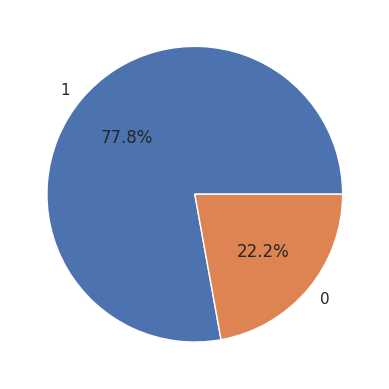

In [153]:
print(df['isAlive'].value_counts())
dt=df.isAlive.value_counts()
plt.pie(dt.values, labels=dt.index, autopct='%1.1f%%')
# plt.legend(labels=['Alive', 'Dead'])
plt.show()

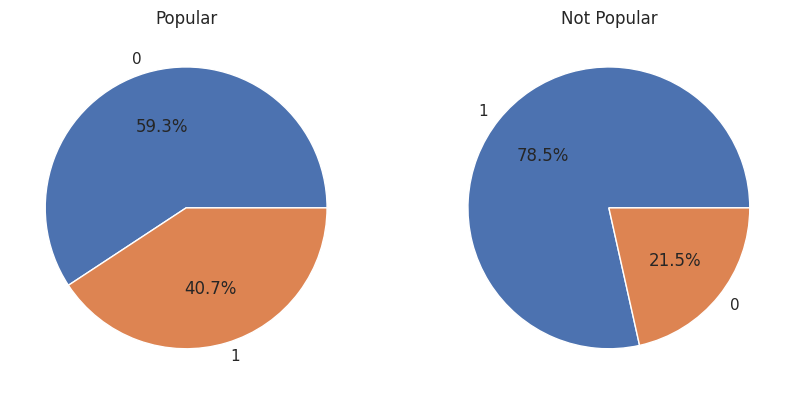

In [167]:
dt1=df.loc[(df.isPopular==1)]["isAlive"].value_counts()
dt2=df.loc[(df.isPopular==0)]["isAlive"].value_counts()
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 8))
ax1.pie(dt1.values, labels=dt1.index, autopct='%1.1f%%')
ax2.pie(dt2.values, labels=dt2.index, autopct='%1.1f%%')
ax1.set_title('Popular')
ax2.set_title('Not Popular')
plt.show()

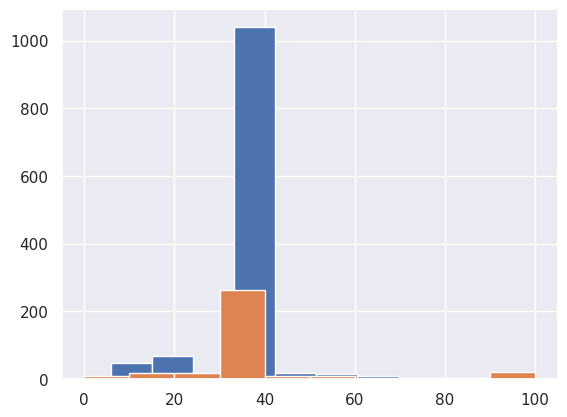

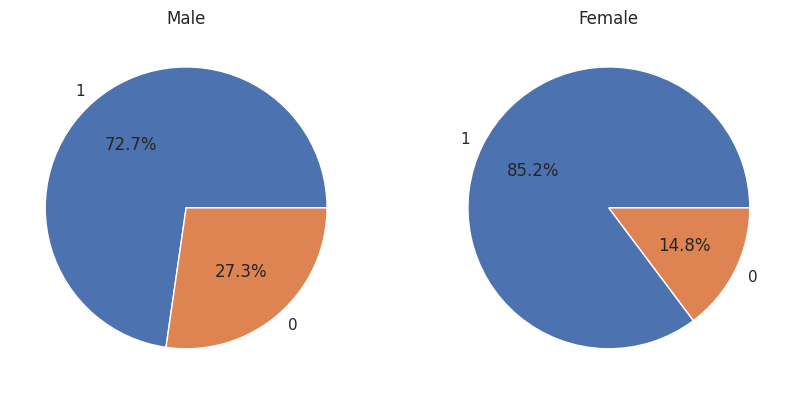

In [178]:
plt.hist(df[(df.isAlive==1)]["age"], label="Alive")
plt.hist(df[(df.isAlive==0)]["age"], label="Dead")
plt.show()

dt1=df.loc[(df.male==1)]["isAlive"].value_counts()
dt2=df.loc[(df.male==0)]["isAlive"].value_counts()
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 8))
ax1.pie(dt1.values, labels=dt1.index, autopct='%1.1f%%')
ax2.pie(dt2.values, labels=dt2.index, autopct='%1.1f%%')
ax1.set_title('Male')
ax2.set_title('Female')
plt.show()

**Задание 1.9.** Создайте переменные `X`,

---

которая будет хранить только значения признаков, и `y`, которая будет хранить только значения целевой переменной.

In [184]:
X = df.drop(columns=["isAlive"]).values
y = df["isAlive"].values

**Задание 1.10.** Разделите датасет на train и test часть при помощи функции `train_test_split`

In [185]:
from sklearn.model_selection import train_test_split

In [186]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [190]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_s = scaler.transform(X_train)
X_test_s = scaler.transform(X_test)


## Часть 2. Обучение моделей

В данной части домашнего задания, мы хотим научиться обучать модели для задачи классификации на наших данных.

**Задание 2.1.** Импортируйте следующие модели из библиотеки `sklearn`
* LogisticRegression
* RandomForestClassifier
* AdaBoostClassifier
* GaussianProcessClassifier
* GaussianNB
* KNeighborsClassifier
* SVC
* DecisionTreeClassifier


В качестве примера, импортируем модель `LogisticRegression`

In [ ]:
from sklearn.linear_model import LogisticRegression

Импортируйте остальные модели из библиотеки `sklearn`. Чтобы понять как это сделать, воспользуйтесь официальный документацией `sklearn` $→$ [тык](https://scikit-learn.org/dev/user_guide.html). По ключевому названию модели, вы сможете найти необходимую информацию о том, как можно импортировать модель из библиотеки.

In [ ]:
from ... import AdaBoostClassifier, RandomForestClassifier
from ... import GaussianProcessClassifier
from ... import GaussianNB
from ... import KNeighborsClassifier
from ... import SVC
from ... import DecisionTreeClassifier

**Задание 2.2.** Обучите модель и сделайте предсказание на тестовой выборке

В качестве примера, обучим модель `LogisticRegression` и сделаем на ней предсказания на тестовой выборке.

In [ ]:
# Шаг 1. создание модели
logistic_regression = LogisticRegression(C=1)

# Шаг 2. обучение модели
logistic_regression.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred = logistic_regression.predict(X_test)

Аналогичным образом обучите остальные модели и сделайте предсказания на тестовой выборке.

In [ ]:
# Шаг 1. создание модели


# Шаг 2. обучение модели


# Шаг 3. Предсказание на тестовых данных


## Часть 3. Оцените качество моделей

Вам необходимо познакомиться с метриками задачи классификации из sklearn. Оцените все модели и выберите лучшую по метрике качества Accuracy.

С метриками классификации вы можете ознакомиться в [Yandex ML Book](https://education.yandex.ru/handbook/ml/article/metriki-klassifikacii-i-regressii).

Для простоты в данном домашнем задании мы будем работать с самой базовой метрикой для задачи классификации - accuracy.

**Задание 3.1.** Вам необходимо посчитать метрику для всех моделей и выбрать лучшую модель.

Сначала импортируем необходимую функцию из библиотеки sklearn для подсчета accuracy.

In [ ]:
from sklearn.metrics import accuracy_score

В качестве примера, посчитаем метрику accuracy для модели `LogisticRegression`

In [ ]:
# Шаг 3. Предсказание на тестовых данных
y_pred = logistic_regression.predict(X_test)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.4f" % accuracy)

Аналогичным образом посчитайте метрику accuracy для остальных моделей

In [ ]:
# Шаг 3. Предсказание на тестовых данных


# Шаг 4. Оценка предсказания по метрике accuracy

print("Accuracy : %.4f" % accuracy)

Выберите лучшую модель.

### Файл `submission.csv`

Вам нужно вместо значений в `submission.csv` файле в колонке `isAlive`, подставить свои предсказания и сохранить измененный файл.

In [ ]:
!gdown 1M14conWjAW2QLoyCXbHEAy8bql2f99eF

Downloading...
From: https://drive.google.com/uc?id=1M14conWjAW2QLoyCXbHEAy8bql2f99eF
To: /content/submission.csv
100% 2.74k/2.74k [00:00<00:00, 9.42MB/s]


In [ ]:
submission = pd.read_csv("/content/submission.csv", index_col='S.No')

In [ ]:
submission

,isAlive
S.No,
1558,0
1559,0
1560,0
1561,0
1562,0
...,...
1942,0
1943,0
1944,0


Как сохранить измененный Pandas DataFrame в csv файл:

In [ ]:
submission.to_csv("/content/new_submission.csv", index=False)